In [16]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

print("Tensor Flow "  + tf.__version__)
print("OpenCV Py "  + cv2.__version__)

Tensor Flow 2.4.0
OpenCV Py 4.2.0


In [17]:
ds = "/Users/zakariyyahusain/ownCloud/University Work/Year 3/Final Year /DataSet"
CATEGORIES = ["Mask", "NoMask"]

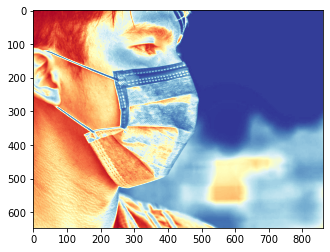

In [18]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(ds,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='RdYlBu')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [19]:
print(img_array.shape)

(647, 862)


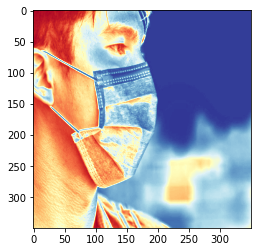

In [20]:
ds_size = 350

new_array = cv2.resize(img_array, (ds_size, ds_size))
plt.imshow(new_array, cmap='RdYlBu')
plt.show()

In [21]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(ds,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (ds_size, ds_size))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass


create_training_data()

print(len(training_data))

337


In [22]:
random.shuffle(training_data)

In [23]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
0
0
1
1
1


In [24]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, ds_size, ds_size, 1))

X = np.array(X).reshape(-1, ds_size, ds_size, 1)

[[[[ 16]
   [ 16]
   [ 16]
   ...
   [ 10]
   [ 10]
   [ 10]]

  [[ 16]
   [ 16]
   [ 16]
   ...
   [  7]
   [  7]
   [  7]]

  [[ 16]
   [ 16]
   [ 16]
   ...
   [  6]
   [  6]
   [  6]]

  ...

  [[  6]
   [  6]
   [  5]
   ...
   [ 83]
   [ 94]
   [103]]

  [[  6]
   [  6]
   [  5]
   ...
   [ 59]
   [ 67]
   [ 65]]

  [[  6]
   [  6]
   [  6]
   ...
   [ 67]
   [ 67]
   [ 67]]]]


In [25]:
np.save('features.npy',X)
np.save('featuresY.npy',y)

In [26]:
X=np.load('features.npy')
y=np.load('featuresY.npy')

In [28]:
X = X/255.0
model = Sequential()

# model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))
# #model.add(Activation('relu'))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))
#######
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
10/10 [==============================] - 29s 2s/step - loss: 0.7078 - accuracy: 0.4945 - val_loss: 0.6765 - val_accuracy: 0.6176
Epoch 2/10
10/10 [==============================] - 23s 2s/step - loss: 0.6767 - accuracy: 0.6047 - val_loss: 0.6652 - val_accuracy: 0.6176
Epoch 3/10
10/10 [==============================] - 23s 2s/step - loss: 0.6664 - accuracy: 0.6176 - val_loss: 0.6651 - val_accuracy: 0.6176
Epoch 4/10
10/10 [==============================] - 24s 2s/step - loss: 0.6672 - accuracy: 0.6146 - val_loss: 0.6749 - val_accuracy: 0.6176
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.6693 - accuracy: 0.6335 - val_loss: 0.6658 - val_accuracy: 0.6176
Epoch 6/10
10/10 [==============================] - 25s 2s/step - loss: 0.6720 - accuracy: 0.6084 - val_loss: 0.6650 - val_accuracy: 0.6176
Epoch 7/10
10/10 [==============================] - 24s 2s/step - loss: 0.6643 - accuracy: 0.6226 - val_loss: 0.6652 - val_accuracy: 0.6176
Epoch 8/10
10/10 [==

NameError: name 'plot_image' is not defined

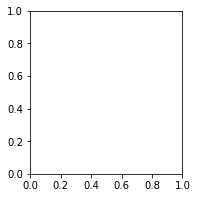

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "Mask-64x2-CNN"

X=np.load('features.npy')
y=np.load('featuresY.npy')

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3,
          callbacks=[tensorboard])

Epoch 1/10
8/8 [==============================] - 26s 3s/step - loss: 6.1195 - accuracy: 0.5440 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 20s 2s/step - loss: 0.7070 - accuracy: 0.5468 - val_loss: 0.6672 - val_accuracy: 0.6471
Epoch 3/10
8/8 [==============================] - 20s 3s/step - loss: 0.6504 - accuracy: 0.6751 - val_loss: 0.7009 - val_accuracy: 0.6373
Epoch 4/10
8/8 [==============================] - 20s 2s/step - loss: 0.5567 - accuracy: 0.7412 - val_loss: 0.8151 - val_accuracy: 0.5490
Epoch 5/10
8/8 [==============================] - 20s 3s/step - loss: 0.5764 - accuracy: 0.6667 - val_loss: 0.5697 - val_accuracy: 0.7255
Epoch 6/10
8/8 [==============================] - 19s 2s/step - loss: 0.3861 - accuracy: 0.8495 - val_loss: 0.5977 - val_accuracy: 0.7353
Epoch 7/10
8/8 [==============================] - 19s 2s/step - loss: 0.3455 - accuracy: 0.8312 - val_loss: 0.5480 - val_accuracy: 0.7549
Epoch 8/10
8/8 [==================

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

NameError: name 'class_names' is not defined

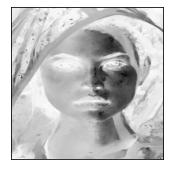

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, X[i], y, X)
plt.subplot(1,2,2)
plot_value_array(i, X[i],  y)
plt.show()